In [2]:
# For using custom module.
import sys
sys.path.append('../custom_library')

In [3]:
import spacy
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd 
import connect_to_db as cn
from gensim import corpora
import gensim
import csv
import parmap
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import seaborn as sns
import pymysql.cursors
import pandas as pd
import numpy as np
import connect_to_db as cn
import json
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import csv
import parmap
import random

In [174]:
sql = "select community_id_fastgreedy_is, count(*) from nodes_until_november group by community_id_fastgreedy_is having count(*) > 2 order by count(*) asc;"
result_df = cn.select_query_result_to_df(sql)
communities = list(np.array(result_df['community_id_fastgreedy_is'].values.tolist()))

In [4]:
from os import listdir

def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_same_topic_num_20_for_tsne")

communities = []

for name in filenames:
    communities.append(name.split('_')[1])

In [6]:
print(communities)
print(len(communities))

['879', '5159', '13211', '8629', '4771', '4264', '1', '944', '13842', '14810', '4554', '7694', '8303', '15395', '3614', '16767', '223', '4979', '1824', '1759', '7390', '3787', '16881', '19626', '12249', '2485', '895', '632', '11949', '2572', '6120', '7460', '414', '18878', '11520', '732', '13908', '988', '14754', '3932', '14275', '14710', '10759', '3733', '3427', '9216', '13931', '1972', '7850', '6295', '8716', '2796', '1449', '10328', '1355', '12708', '4824', '5392', '5180', '10033', '2034', '3611', '20379', '7029', '1474', '9970', '3069', '4586', '460', '11884', '626', '13357', '17885', '5952', '4432', '6391', '8669', '18891', '10053', '14377', '19651', '4100', '12869', '17761', '7080', '3738', '1882', '5925', '9480', '10535', '3612', '6267', '2168', '16876', '19517', '158', '6636', '16706', '10241', '1794', '19709', '10947', '12113', '2025', '5536', '5263', '7215', '3053', '525', '16953', '4534', '7418', '6692', '5256', '1579', '3548', '9297', '3544', '15092', '18141', '1303', '607'

In [7]:
# print(filenames)
print(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[0]}')

../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/community_879_topics_20_words.csv


In [163]:
import math

mean_vector_list = []
topics_num = []
filenames_filtered = []

for i in range(len(filenames)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_same_topic_num_20_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = sum(topics, [])
        if len(topics) != 20:
            continue
        filenames_filtered.append(filenames[i])
        topics_num.append(len(topics))
        model = Word2Vec(topics, min_count=1)
        model.train(topics, total_examples=1, epochs=1)
    
        word_vectors = model.wv
        # print(len(word_vectors))

        # print(word_vectors[0].tolist())

        word_vector_list = []
        mean_vector = []
    
        for i in range(len(word_vectors)):
            word_vector_list.append(word_vectors[i].tolist())
        
        for element in zip(*word_vector_list):
            mean_vector.append(float(np.mean(element)))
        
        mean_vector_list.append(mean_vector)

In [164]:
print(mean_vector_list[0][0])

-0.00015094088270085524


In [165]:
# convert list to np.array
mean_vector_array = np.array(mean_vector_list)
print(mean_vector_array)

[[-1.50940883e-04  1.71308901e-03  1.10035936e-03 ...  7.94441069e-05
   4.01163336e-04  1.14796011e-03]
 [-2.18874855e-04  1.48581629e-03  6.76247650e-04 ... -3.28942185e-04
   6.99413109e-04  1.03900150e-03]
 [-1.68731336e-04  1.73810833e-03  1.11120047e-03 ...  9.21001496e-05
   4.13325139e-04  1.14226649e-03]
 ...
 [-3.17402761e-04  1.47373948e-03  1.12430344e-03 ...  3.36921209e-04
   5.51419567e-04  1.56293381e-03]
 [-4.65598498e-04  1.40052356e-03  1.49047357e-03 ... -1.11083703e-04
   6.35531396e-04  1.37985796e-03]
 [-4.65506343e-04  1.40812797e-03  1.50886425e-03 ... -1.43471611e-04
   5.99038043e-04  1.38655243e-03]]


## t-SNE

In [166]:
from sklearn.manifold import TSNE

data = mean_vector_array
print(type(data))
print(data)
# n_components = 2

# model = TSNE(n_components=n_components)
# print(model.fit_transform(data))

plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[-1.50940883e-04  1.71308901e-03  1.10035936e-03 ...  7.94441069e-05
   4.01163336e-04  1.14796011e-03]
 [-2.18874855e-04  1.48581629e-03  6.76247650e-04 ... -3.28942185e-04
   6.99413109e-04  1.03900150e-03]
 [-1.68731336e-04  1.73810833e-03  1.11120047e-03 ...  9.21001496e-05
   4.13325139e-04  1.14226649e-03]
 ...
 [-3.17402761e-04  1.47373948e-03  1.12430344e-03 ...  3.36921209e-04
   5.51419567e-04  1.56293381e-03]
 [-4.65598498e-04  1.40052356e-03  1.49047357e-03 ... -1.11083703e-04
   6.35531396e-04  1.37985796e-03]
 [-4.65506343e-04  1.40812797e-03  1.50886425e-03 ... -1.43471611e-04
   5.99038043e-04  1.38655243e-03]]
[[ 38.79055     9.735121 ]
 [ -3.603233   42.000835 ]
 [ 42.115353   11.339533 ]
 ...
 [  6.0738306 -61.650917 ]
 [-20.09358   -43.032852 ]
 [-21.224943  -43.29245  ]]


In [167]:
len(filenames_filtered)


2520

In [168]:
len(data_tsne)

2520

In [66]:
print(len(data))
# print(len(topics_num))

# print(topics_num)

2520


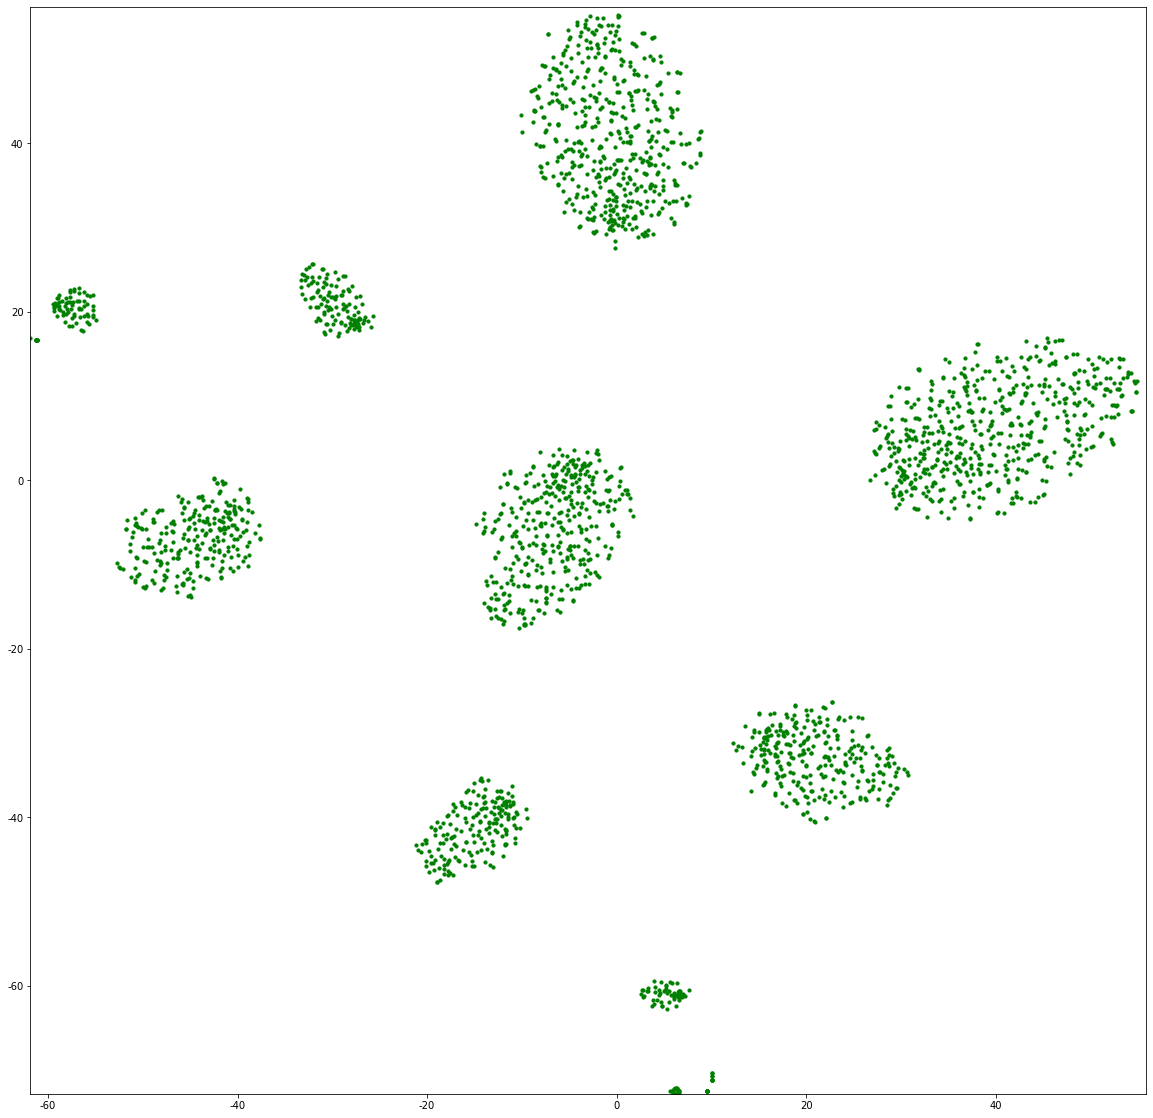

In [169]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    elif topics_num[i] == 3:
        color = 'b'
    else:
        color = 'g'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

## global all topic words list

In [370]:
def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne")

all_topic_words = []

for i in range(len(filenames)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = sum(topics, [])
        s_tw = set(topics)
        all_topic_words.append(topics)
        
all_topic_words_from_all_files = sum(all_topic_words, [])
print(len(all_topic_words_from_all_files))

82795


In [88]:
def word_count_and_tf_idf_similarity(filenames, print_word_count=False, average=True):
    all_topic_words = []
    len_files = len(filenames)
    
    
    # print(f'topic_num: {topic_num}')
    # print('')
    
    for i in range(len(filenames)):
        with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_same_topic_num_20_for_tsne/{filenames[i]}', 
                  newline='') as f:
            reader = csv.reader(f)
            topics = list(reader)
            topics = sum(topics, [])
            s_tw = set(topics)
            all_topic_words.append(topics)
           
            tw_count_list = []
        
            for tw in s_tw:
                tw_count_list.append([tw, topics.count(tw)])
            
            tw_count_dict = dict(tw_count_list)
            sorted_dict = sorted(tw_count_dict.items(), key = lambda item: item[1], reverse = True)
            
            if print_word_count:
                print(filenames[i])
                print(sorted_dict)
                print()
                
    all_topic_words = sum(all_topic_words, [])
    s_atw = set(all_topic_words)
    
    atw_count_list = []
    
    for tw in s_atw:
        if average:
            atw_count_list.append([tw, float(round(all_topic_words.count(tw) / len_files, 4))])
        else:
            atw_count_list.append([tw, all_topic_words.count(tw)])
        
    atw_count_dict = dict(atw_count_list)
    all_sorted_dict = sorted(atw_count_dict.items(), key = lambda item: item[1], reverse = True)
    
    #print('all topic words count')
    #print(all_sorted_dict)
    #print()
    
    # print(f'number of topic words: {len(all_topic_words)}, number of communities: {len(filenames)}')
    # print()
    # print(f'random tf-idf similarity: {tf_idf_similarity_from_list(random.sample(all_topic_words_from_all_files, len(all_topic_words)))}')
    # print(f'tf-idf similarity: {tf_idf_similarity_from_list(all_topic_words)}')
    
    return all_sorted_dict

# cluster analysis (total 10 clusters)

In [183]:
clusters = []

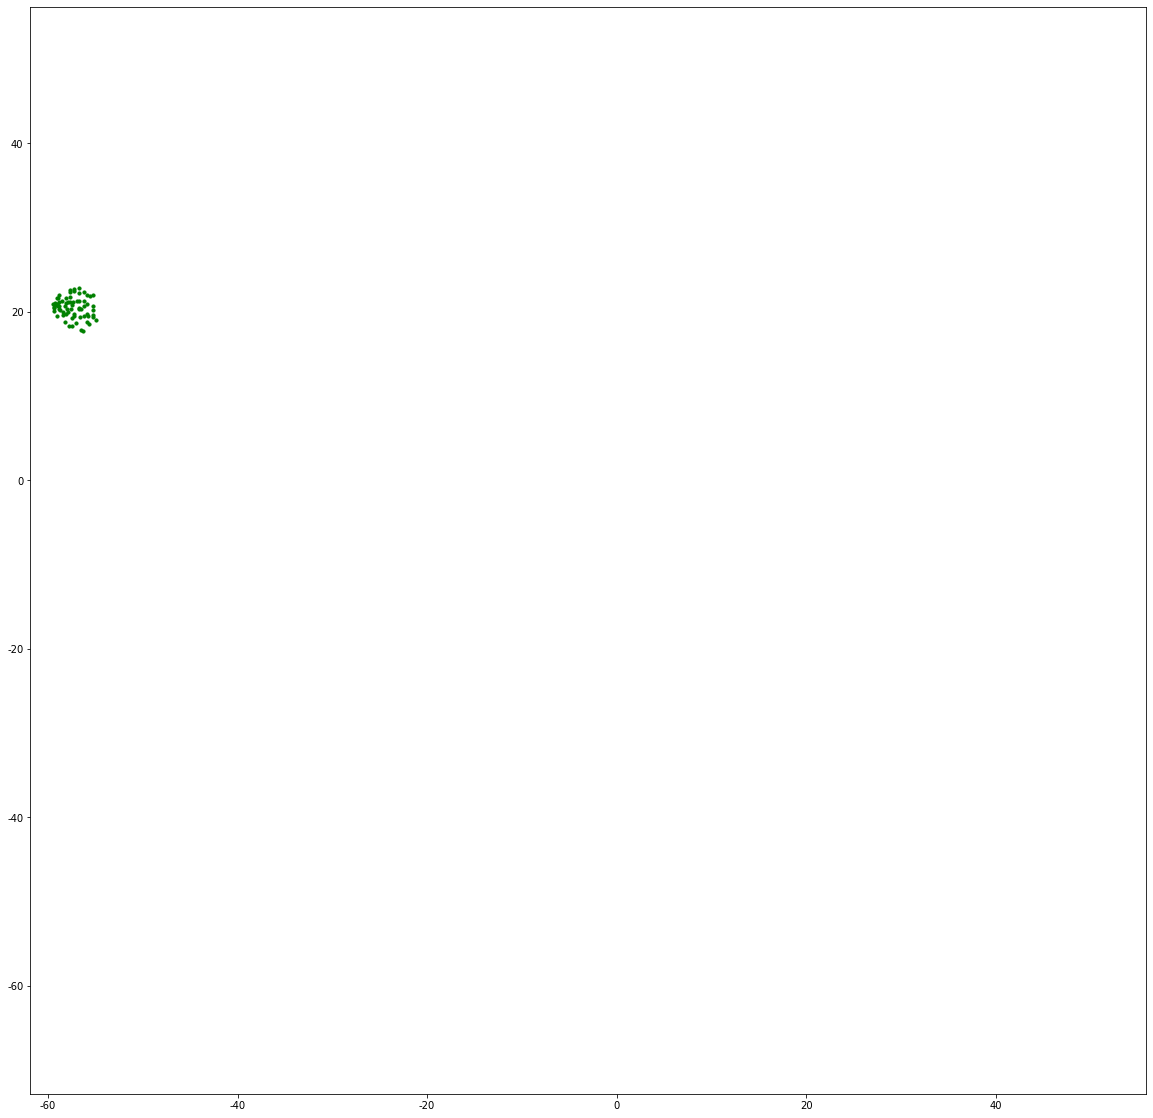

In [184]:
cluster_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if data_tsne[i,0] > -59.8 and data_tsne[i,0] < -50 and data_tsne[i,1] > 10:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_1.append(filenames_filtered[i])
        
clusters.append(cluster_1)

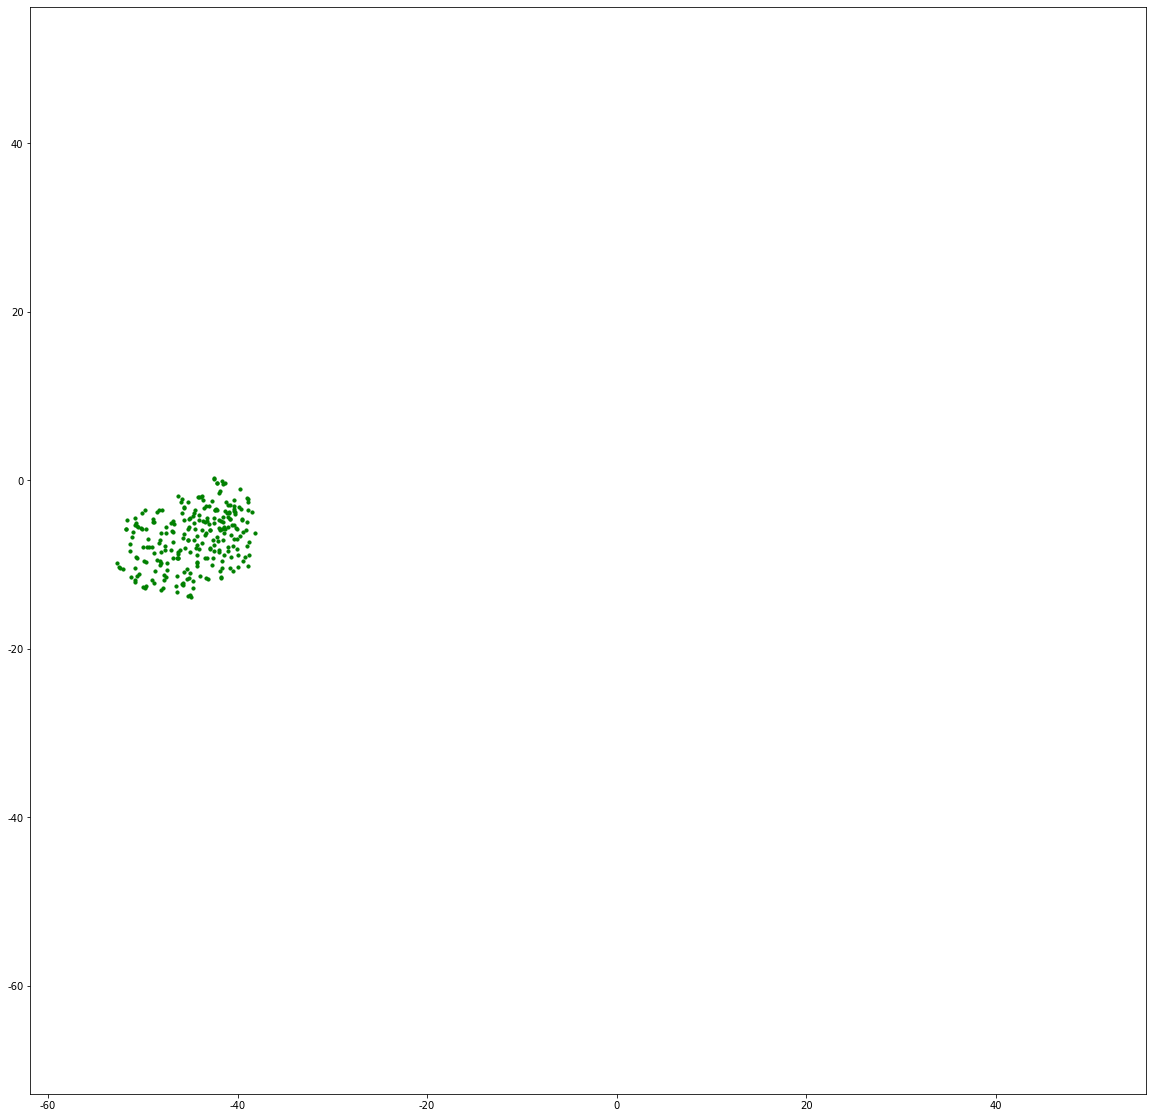

In [185]:
cluster_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if data_tsne[i,0] > -59.8 and data_tsne[i,0] < -38 and data_tsne[i,1] < 5:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_2.append(filenames_filtered[i])
        
clusters.append(cluster_2)

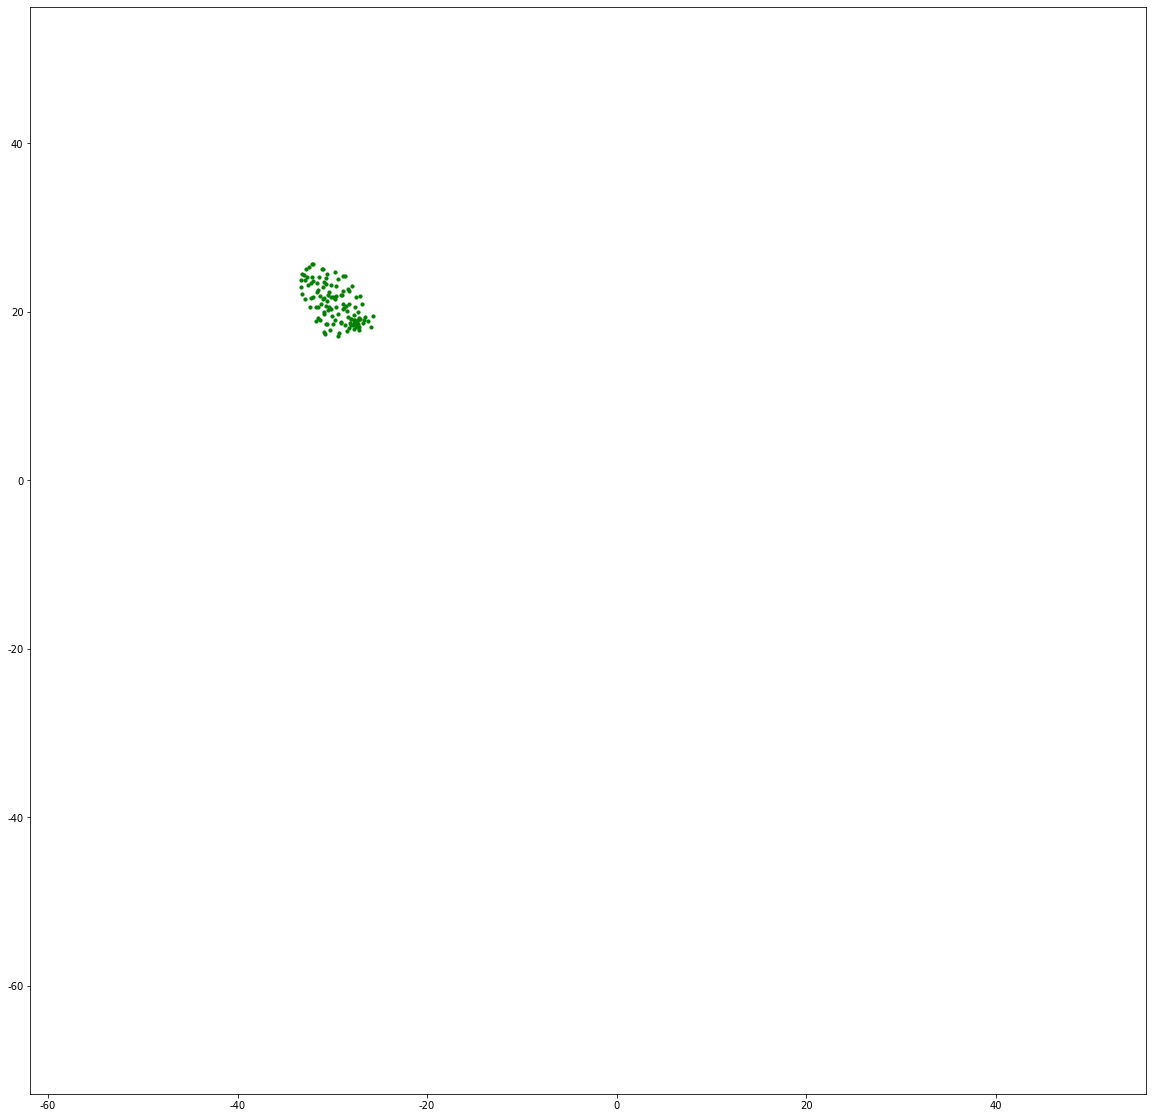

In [186]:
cluster_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if data_tsne[i,0] > -37.5 and data_tsne[i,0] < -22:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_3.append(filenames_filtered[i])
        
clusters.append(cluster_3)

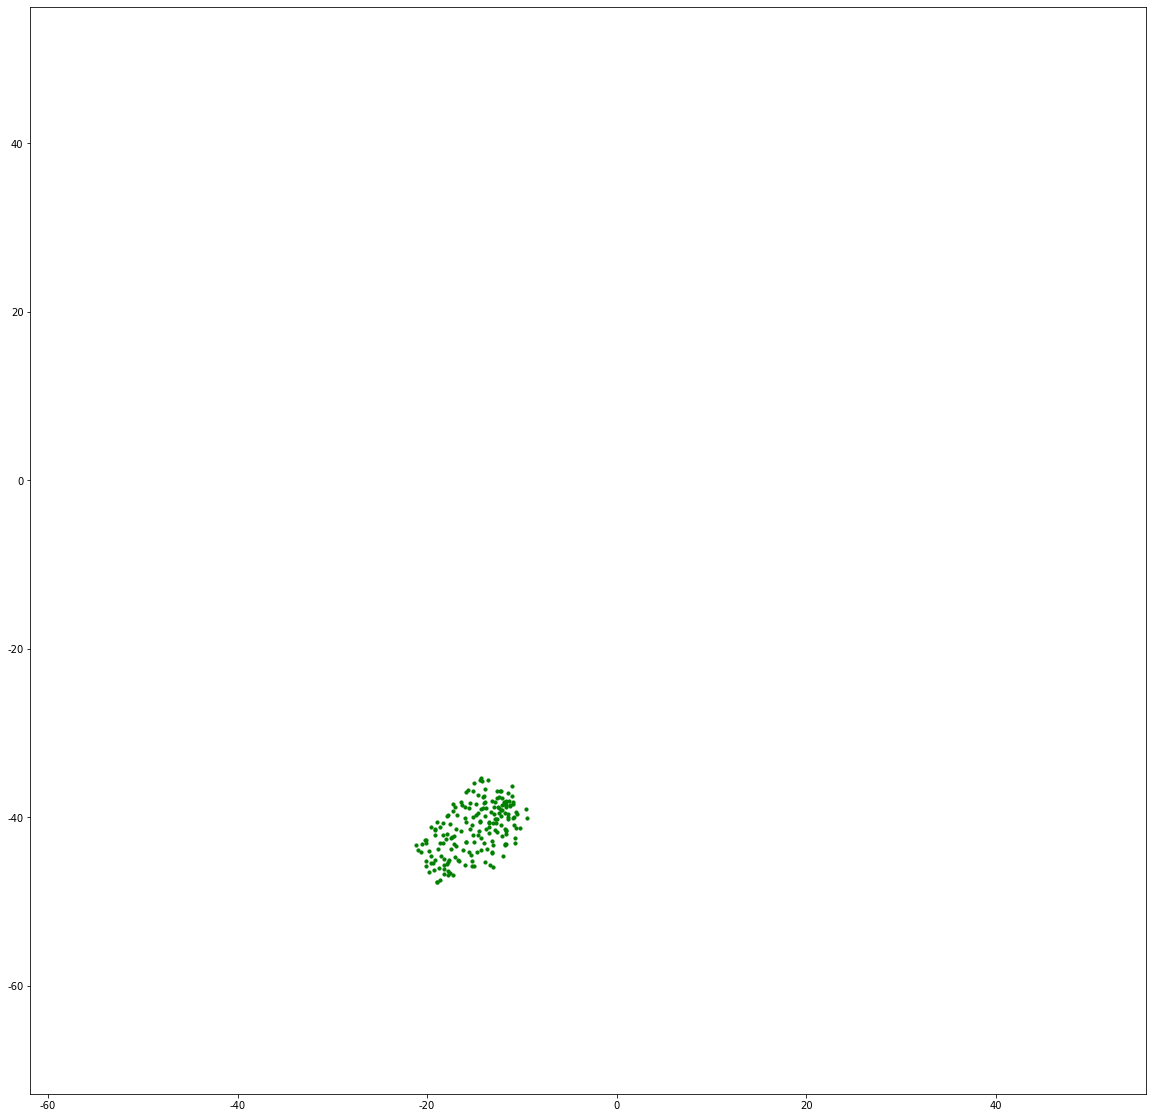

In [187]:
cluster_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if data_tsne[i,0] < -8 and data_tsne[i,1] < -22:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_4.append(filenames_filtered[i])
        
clusters.append(cluster_4)

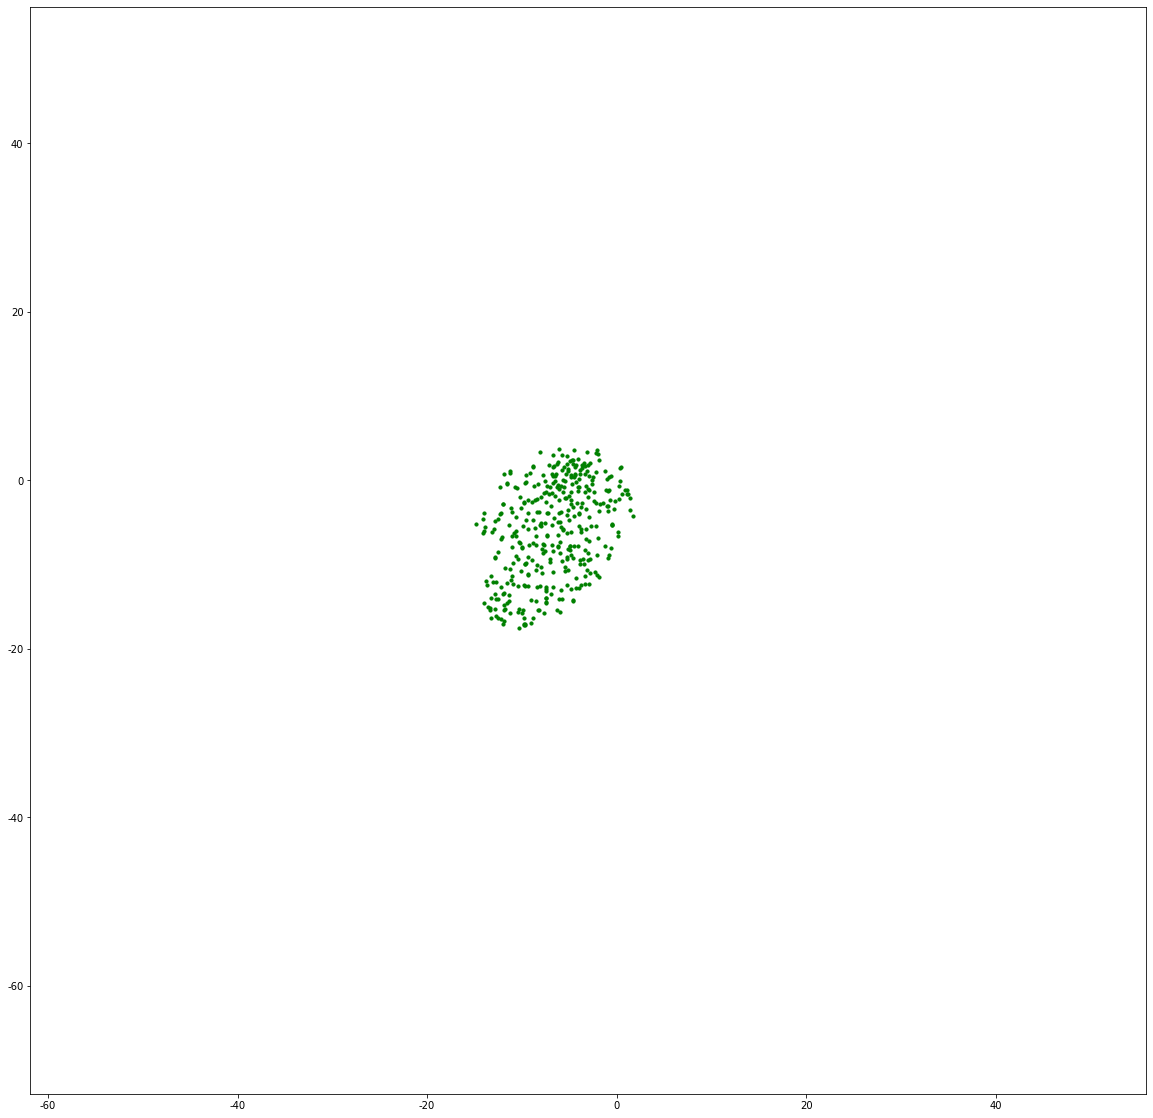

In [188]:
cluster_5 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if data_tsne[i,0] > -20 and data_tsne[i,0] < 5 and data_tsne[i,1] > -20 and data_tsne[i,1] < 10:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_5.append(filenames_filtered[i])
        
clusters.append(cluster_5)

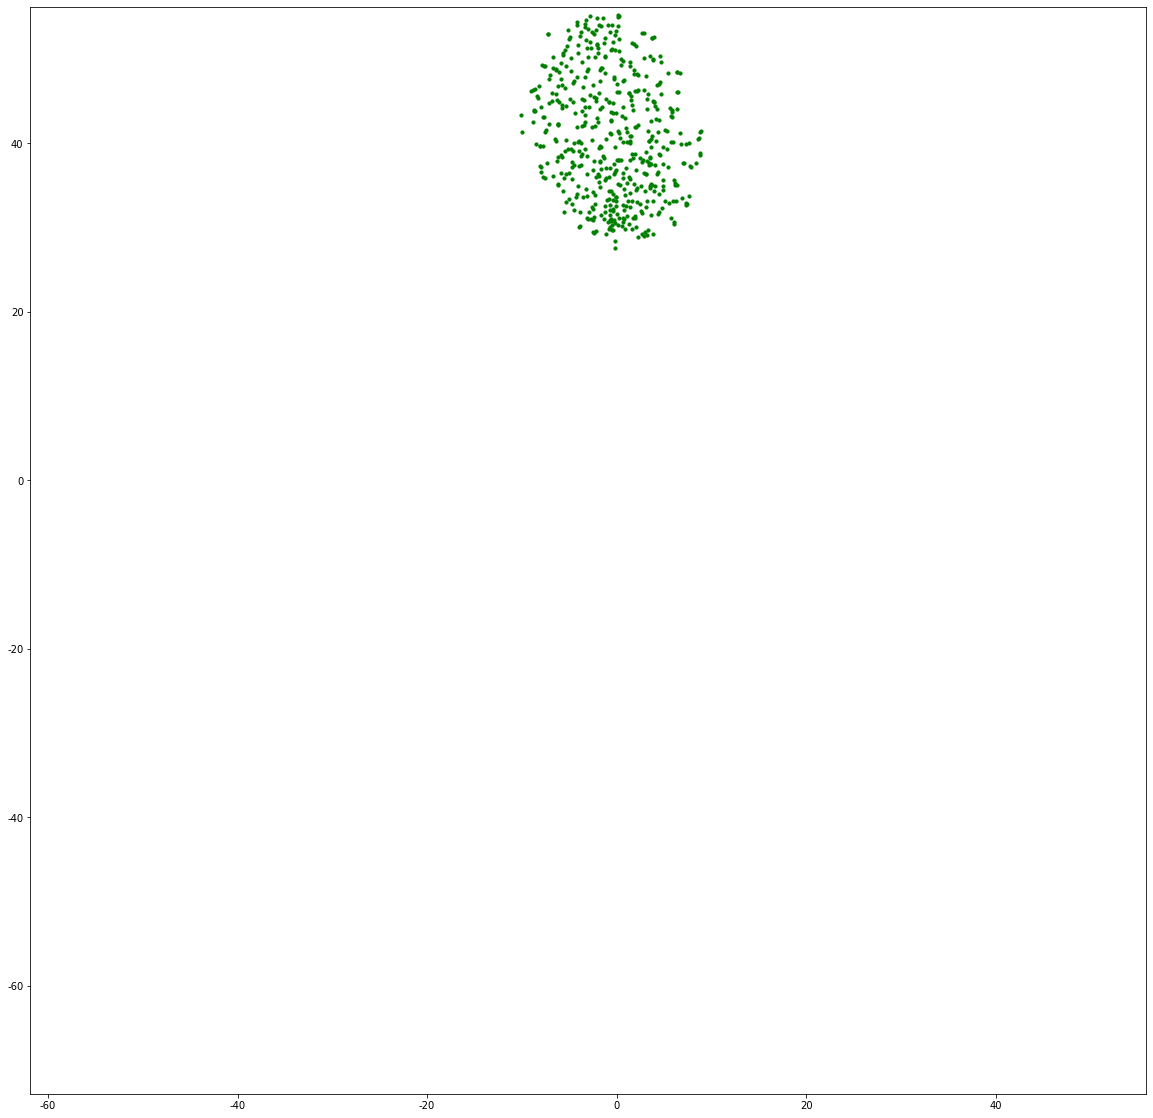

In [189]:
cluster_6 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if data_tsne[i,0] > -17 and data_tsne[i,0] < 10 and data_tsne[i,1] > 20:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_6.append(filenames_filtered[i])
        
clusters.append(cluster_6)

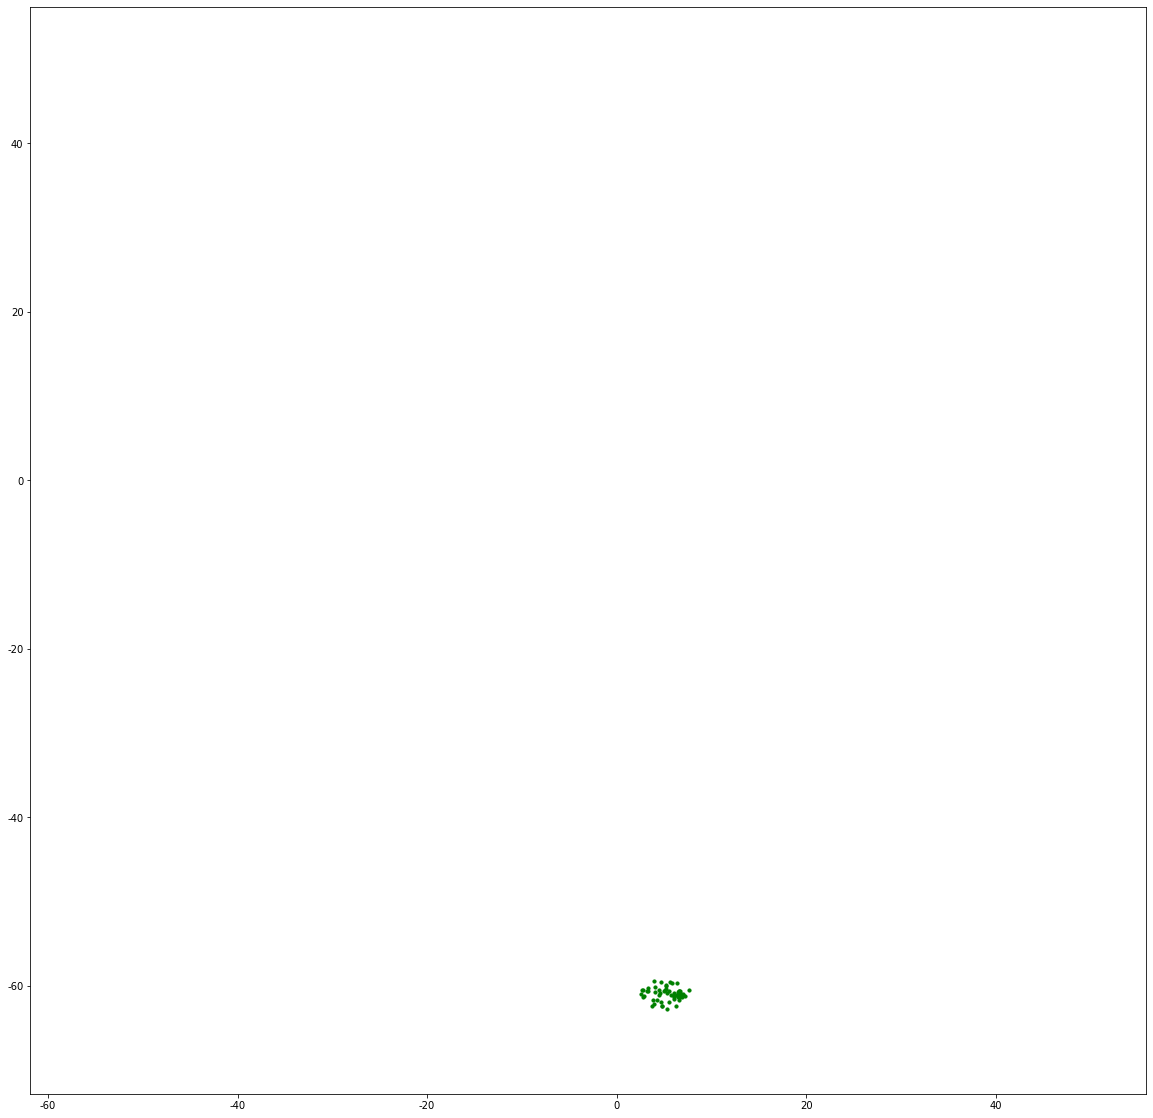

In [190]:
cluster_7 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if data_tsne[i,1] > -65 and data_tsne[i,1] < -57:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_7.append(filenames_filtered[i])
        
clusters.append(cluster_7)

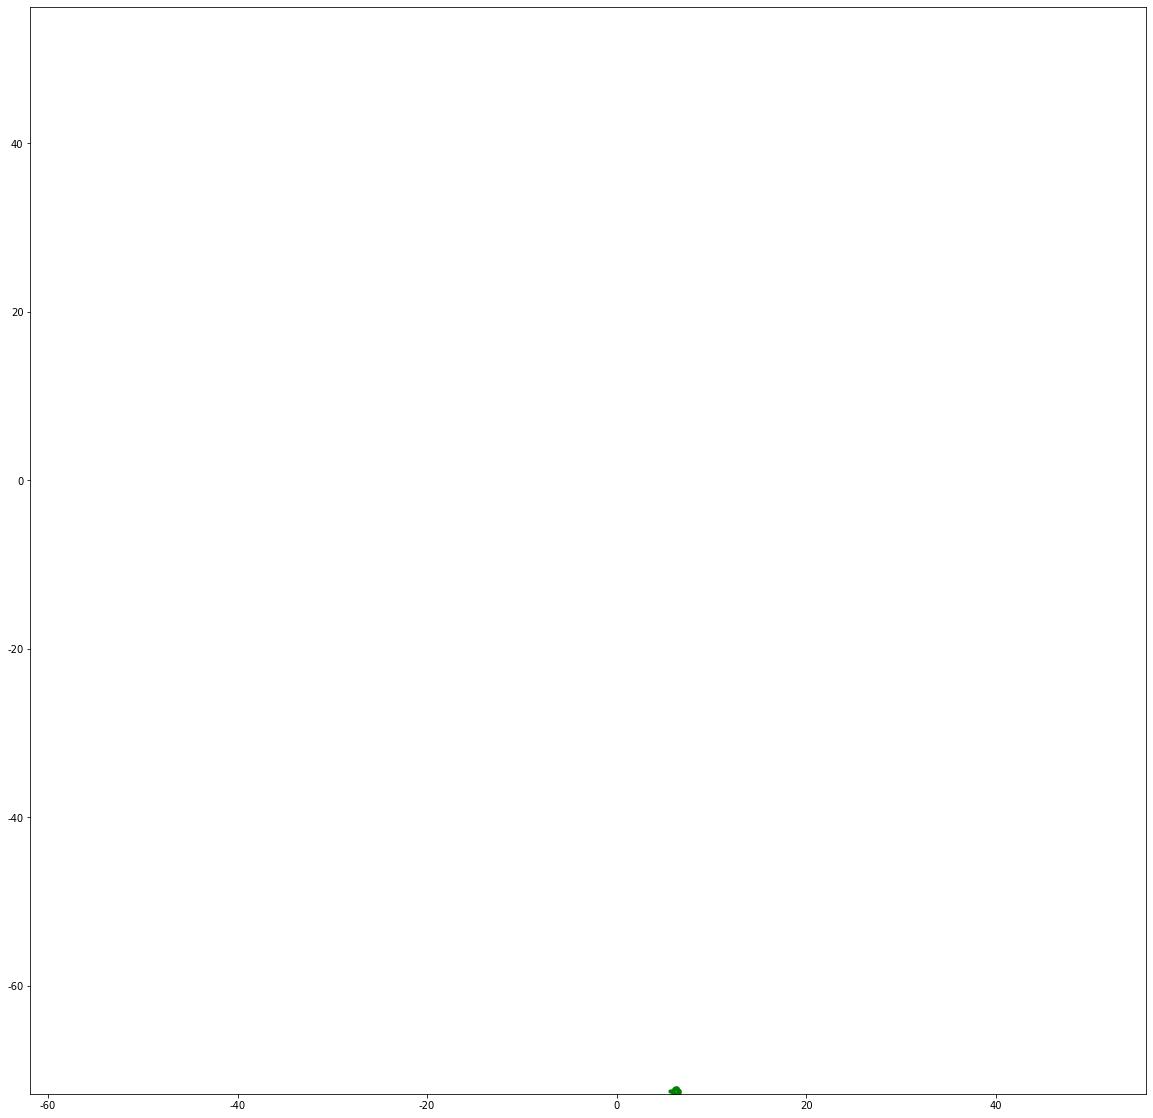

In [191]:
cluster_8 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if data_tsne[i,0] < 8 and data_tsne[i,1] < - 70:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_8.append(filenames_filtered[i])
        
clusters.append(cluster_8)

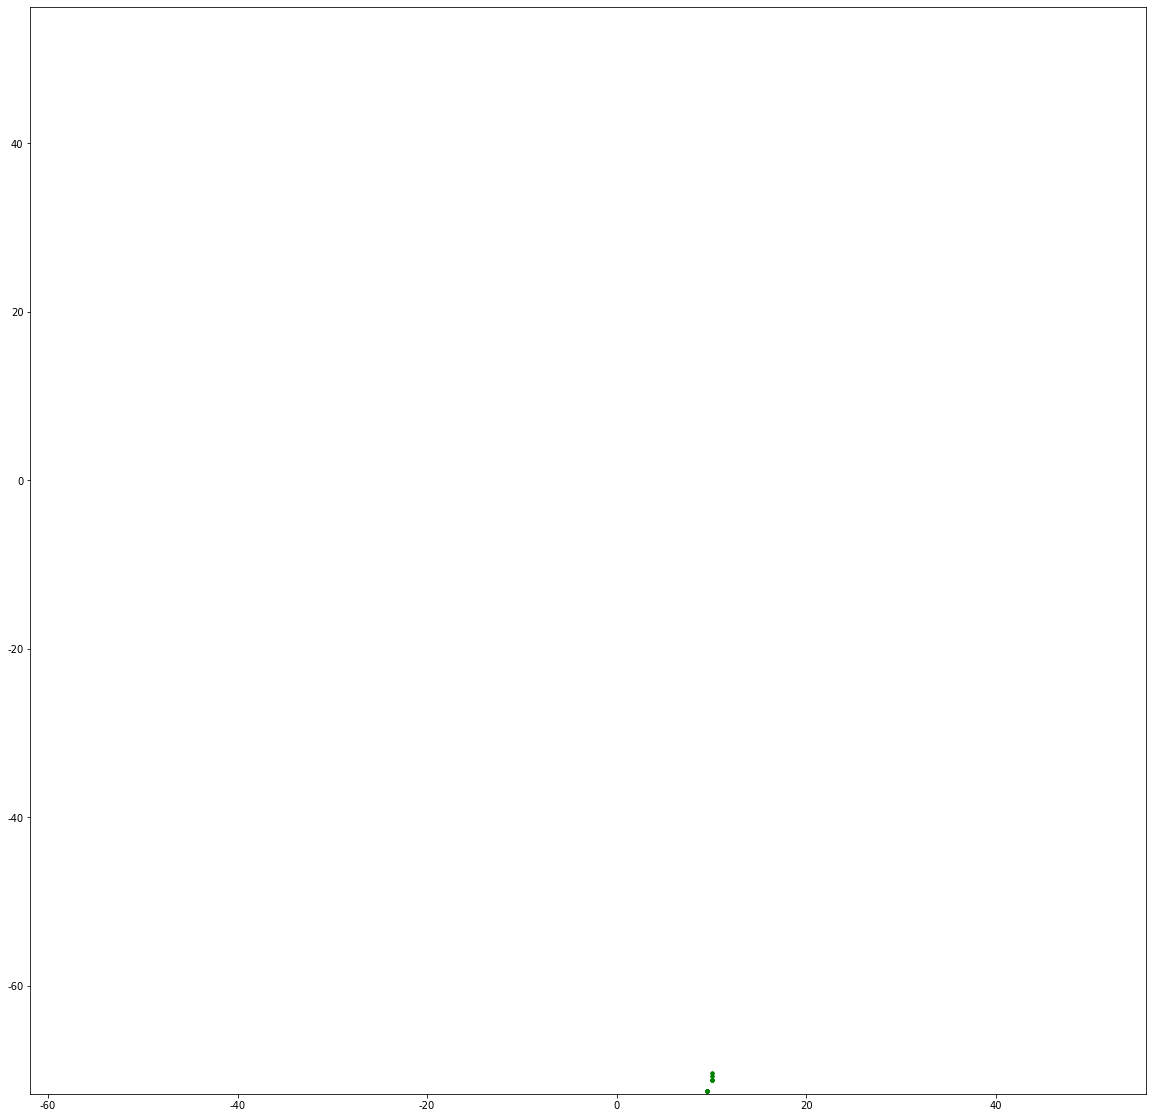

In [192]:
cluster_9 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if data_tsne[i,0] > 8 and data_tsne[i,0] < 15 and data_tsne[i,1] < - 70:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_9.append(filenames_filtered[i])
        
clusters.append(cluster_9)

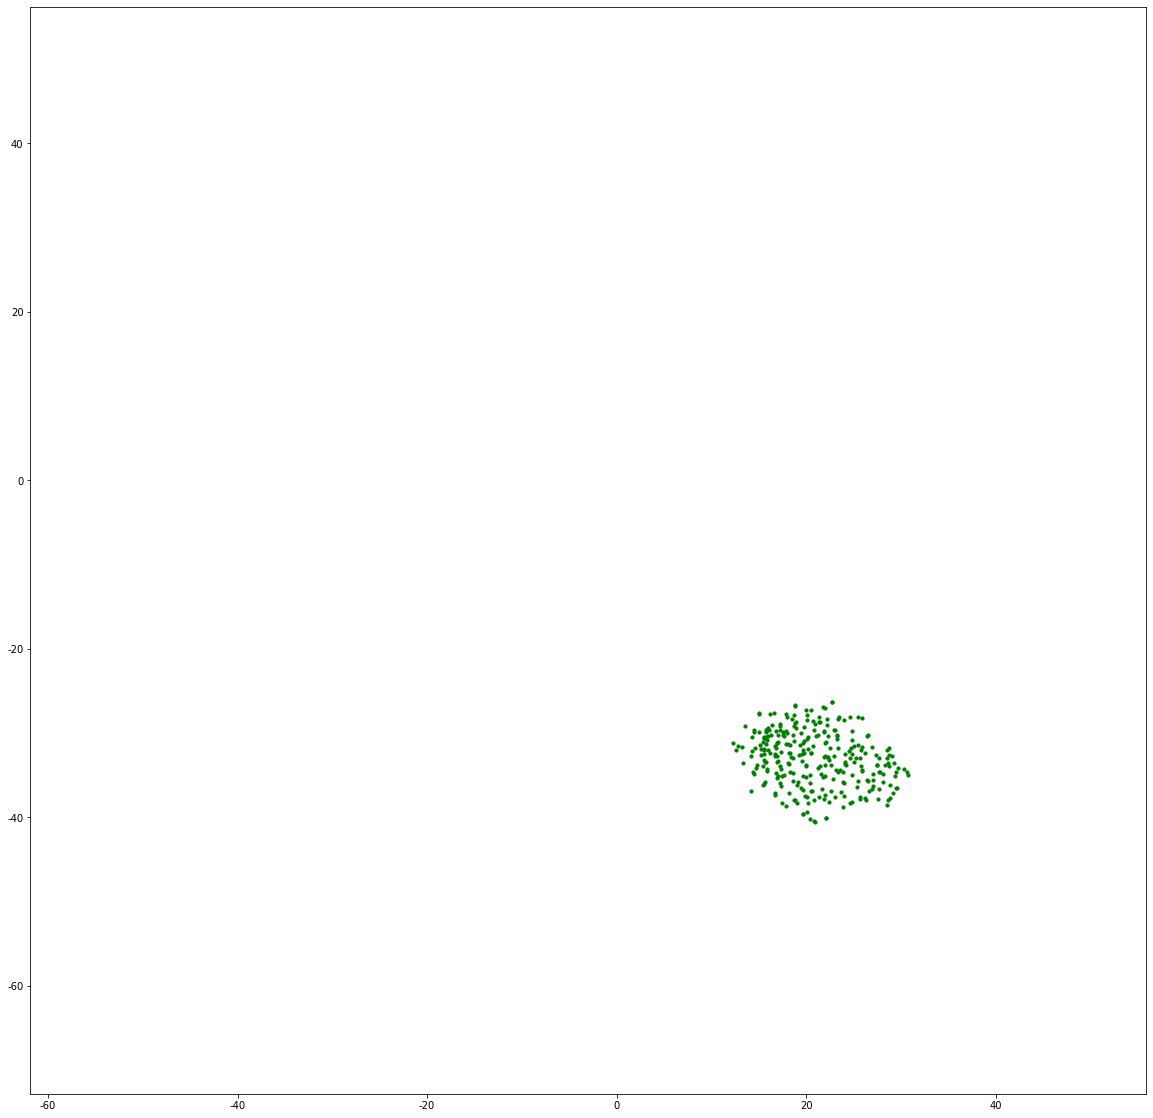

In [193]:
cluster_10 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if data_tsne[i,0] > 11 and data_tsne[i,1] < - 20:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_10.append(filenames_filtered[i])
        
clusters.append(cluster_10)

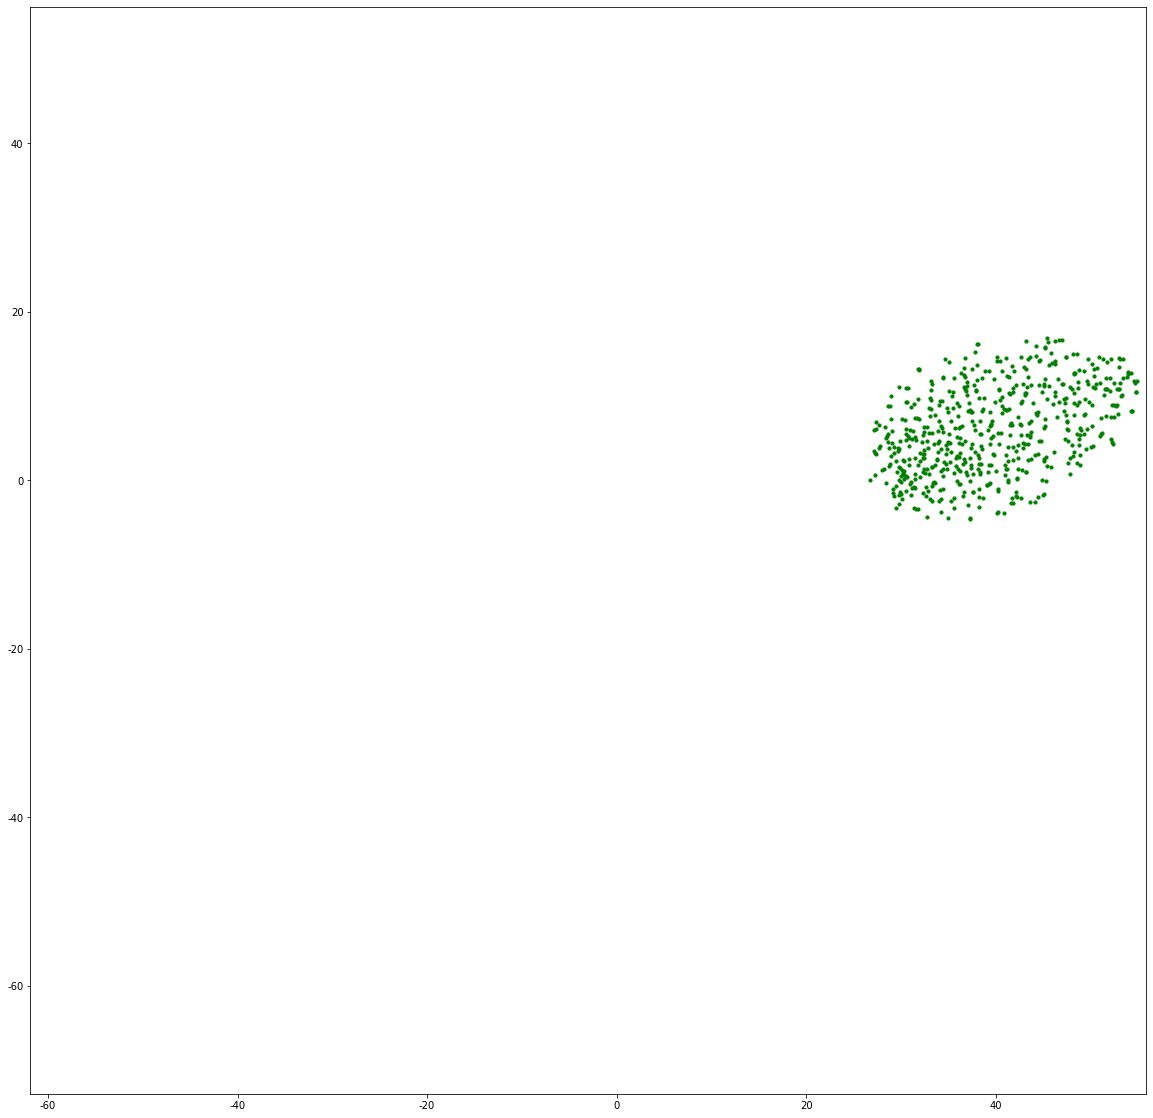

In [194]:
cluster_11 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if data_tsne[i,0] > 20 and data_tsne[i,1] > - 20:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_11.append(filenames_filtered[i])
        
clusters.append(cluster_11)

In [195]:
print(len(clusters))
# clusters

11


In [196]:
rsts = list(map(word_count_and_tf_idf_similarity, clusters))

for i in range(len(rsts)):
    print(f'cluster {i+1}')
    for j in range(len(rsts[i])):
        if rsts[i][j][1] > 0.05:
            print(rsts[i][j], end=' ')
    print()
    print()

cluster 1
('life', 0.2571) ('need', 0.2571) ('year', 0.2429) ('friend', 0.2143) ('die', 0.2) ('hate', 0.2) ('one', 0.2) ('think', 0.1857) ('kill', 0.1714) ('mom', 0.1571) ('time', 0.1571) ('talk', 0.1571) ('day', 0.1429) ('feeling', 0.1429) ('go', 0.1429) ('today', 0.1429) ('stop', 0.1429) ('parent', 0.1286) ('dad', 0.1286) ('point', 0.1143) ('suicide', 0.1143) ('end', 0.1143) ('old', 0.1143) ('care', 0.1143) ('scared', 0.1) ('never', 0.1) ('mental', 0.1) ('depression', 0.1) ('first', 0.1) ('still', 0.1) ('right', 0.1) ('alone', 0.1) ('anything', 0.0857) ('made', 0.0857) ('tonight', 0.0857) ('suicidal', 0.0857) ('yesterday', 0.0857) ('thought', 0.0857) ('therapist', 0.0857) ('depressed', 0.0857) ('done', 0.0714) ('find', 0.0714) ('even', 0.0714) ('wish', 0.0714) ('ive', 0.0714) ('much', 0.0714) ('died', 0.0714) ('started', 0.0714) ('therapy', 0.0714) ('person', 0.0714) ('gonna', 0.0571) ('let', 0.0571) ('you', 0.0571) ('good', 0.0571) ('trying', 0.0571) ('shit', 0.0571) ('passed', 0.05

In [197]:
idx = 1

for count in zip(*map(word_count_and_tf_idf_similarity, clusters)):
    print(f'{idx}:{count}')
    print()
    idx += 1

1:(('life', 0.2571), ('life', 0.3071), ('life', 0.2583), ('life', 0.2579), ('life', 0.2734), ('life', 0.2798), ('life', 0.2931), ('still', 0.25), ('life', 0.25), ('life', 0.2551), ('life', 0.2909))

2:(('need', 0.2571), ('need', 0.2362), ('anxiety', 0.2417), ('need', 0.1737), ('depression', 0.2057), ('need', 0.2407), ('anxiety', 0.1724), ('anxiety', 0.2083), ('talk', 0.25), ('friend', 0.1769), ('need', 0.1842))

3:(('year', 0.2429), ('think', 0.2008), ('friend', 0.2), ('friend', 0.1737), ('anxiety', 0.1979), ('friend', 0.2133), ('depression', 0.1724), ('talk', 0.2083), ('anxiety', 0.2), ('need', 0.1633), ('depression', 0.1756))

4:(('friend', 0.2143), ('one', 0.1969), ('never', 0.1583), ('anxiety', 0.1579), ('friend', 0.1823), ('depression', 0.2035), ('feeling', 0.1552), ('hate', 0.1667), ('friend', 0.15), ('depression', 0.1497), ('time', 0.1756))

5:(('die', 0.2), ('depression', 0.185), ('need', 0.15), ('depression', 0.1526), ('need', 0.151), ('think', 0.1742), ('depressed', 0.1552), 